# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### The problem 
* Develop a neural network model to predict the house price based on the above features.

In [3]:
#
# Your code to import libraries, numpy, pandas, matplotlib,  seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [4]:
# Your code to read the data from the file provided.
data=pd.read_csv('kc_house_data.csv')

In [5]:
?pd

# Exploratory Data Analysis

Perform some data analysis using the libraries above. 
Visualise the features to understand the problem and use the appropriate features for the model. 

In [6]:
# Your code to check if any null value is present in the dataset. Hint - use isnull() in pandas
data.isnull()
    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Your code to describe the dataset to get imortant properties of it.
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Let's see how price columns look like i.e. how prices are distributed.

C:\Users\BABATUNDE\AppData\Local\Temp\ipykernel_15508\2463666856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

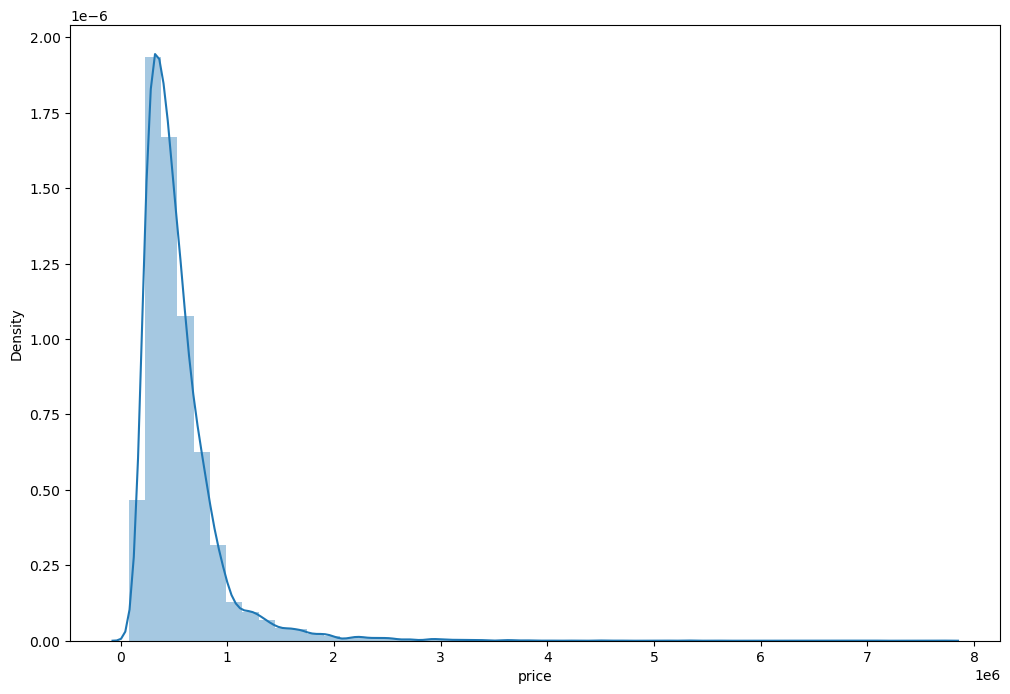

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(data['price'])

#### Let's look at the columns - number of bedroom in more detail
#### Write code to plot the numbers of bedrooms and the number of times they appear in the data.  
####The x-axis contains the number of bedrroms and the y axis will portray the number of times the particular bedroom appears in the column.

#### Hint - use sns.countplot.  

C:\Users\BABATUNDE\AppData\Local\Temp\ipykernel_15508\1879831479.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bedrooms'] )


<Axes: xlabel='bedrooms', ylabel='Density'>

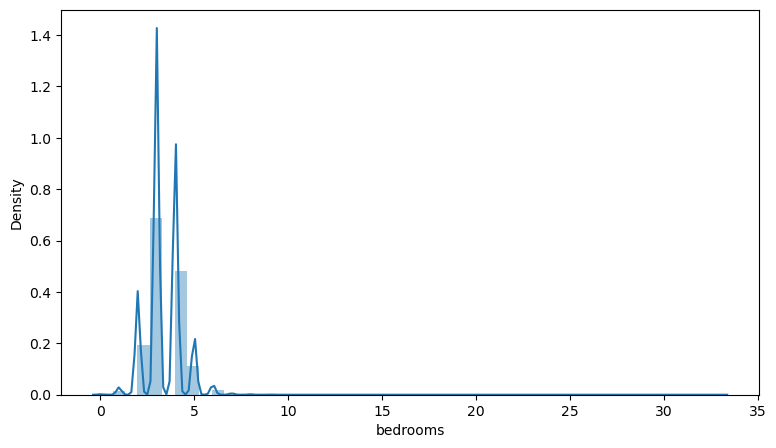

In [14]:
# Your code to plot number of bedrooms and their counts
plt.figure(figsize=(9,5))
sns.distplot(data['bedrooms'] )


# Plot a scatter plot between the price and sqft_living column. 

In [367]:
sns.countplot?

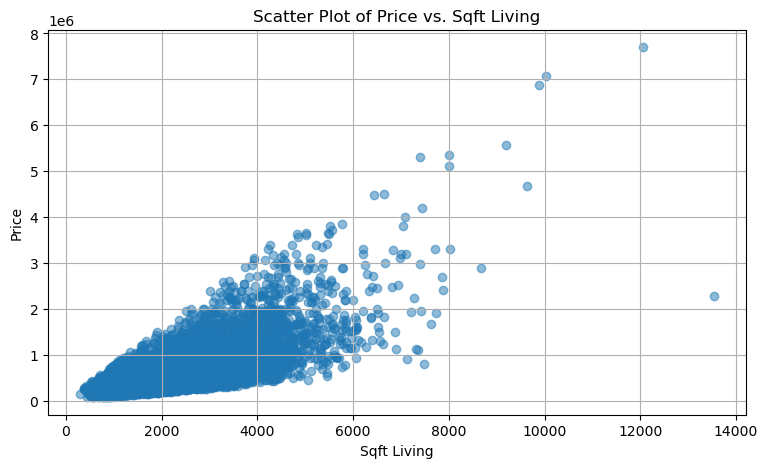

In [15]:
# You code to visualize an scatter plot. 
plt.figure(figsize=(9,5))
plt.scatter(data['sqft_living'] , data['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

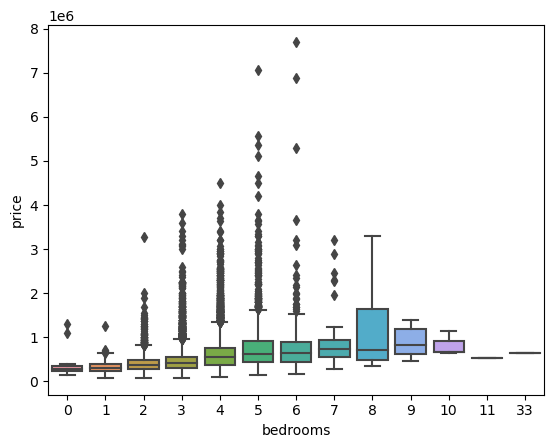

In [369]:
sns.boxplot(x='bedrooms',y='price',data=data) 

### Geographical Properties

Visulaize an scatter plot between price and longitude (long) and latidtude (lat)  columns.

plt.figure(figsize=(12,8))
plt.scatter(df['long'] , df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs. Sqft Living')
plt.xlabel('longitude')
plt.ylabel('Price')
plt.grid(True)
plt.show()

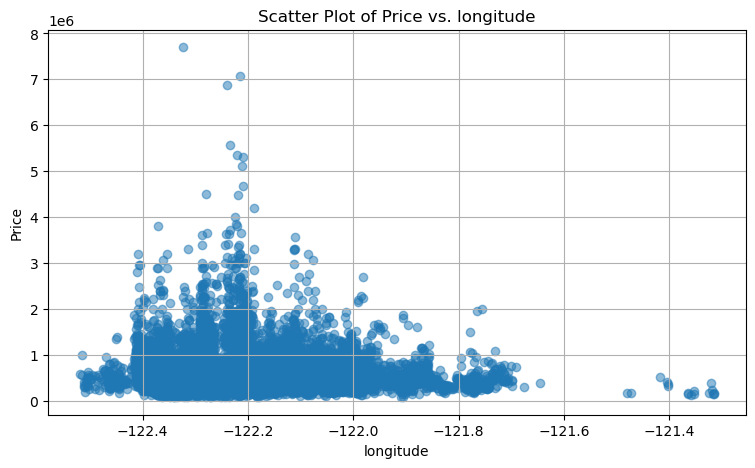

In [16]:
# Your code to visualize an scatter plot between price and longitude (long) column.
plt.figure(figsize=(9,5))
plt.scatter(data['long'] , data['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs. longitude')
plt.xlabel('longitude')
plt.ylabel('Price')
plt.grid(True)
plt.show()

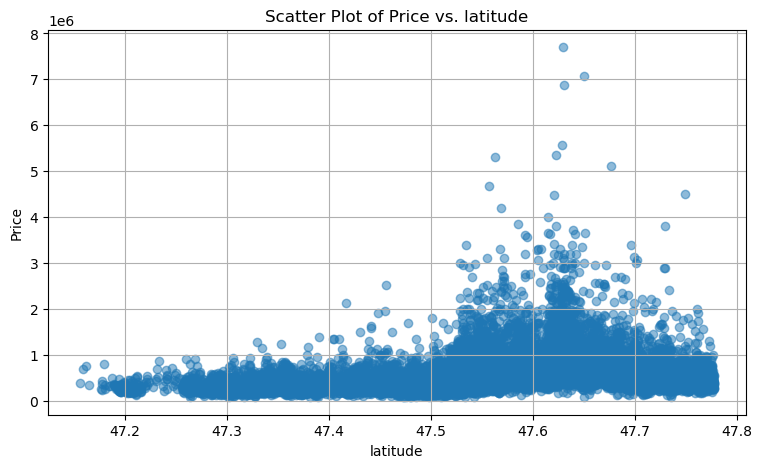

In [17]:
# Your code to visualize an scatter plot between price and latitude(lat) column.
plt.figure(figsize=(9,5))
plt.scatter(data['lat'] , data['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs. latitude')
plt.xlabel('latitude')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Axes: xlabel='long', ylabel='lat'>

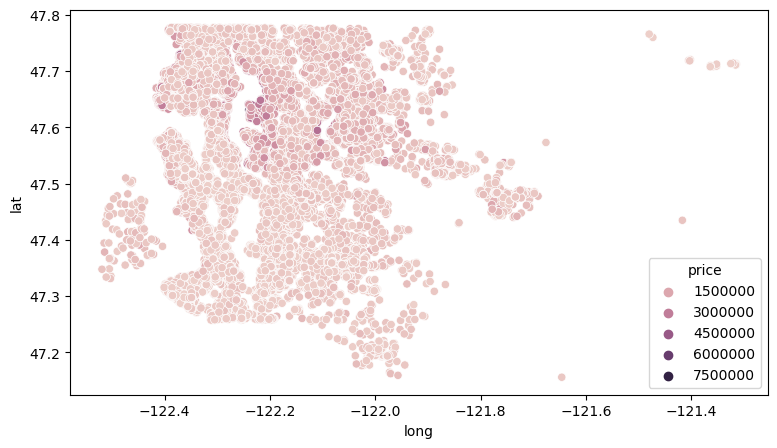

In [18]:
plt.figure(figsize=(9,5))
sns.scatterplot(x ='long', y = 'lat', data= data, hue = 'price')


# Sort the values in the dataframe according to price and print first few rows.

In [373]:
sns.scatterplot?

In [374]:
# Your code to sort data frame according to the price (ascending order) and see first few rows. Hint - Use df.sort and combine it with head()
sorted_data = data.sort_values(by='price', ascending=True)
sorted_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


#### The following code visualizes the price intensity with the latitude and longitude for 1% of the data.

#### You need to add comment on each line of the code.

<Axes: xlabel='long', ylabel='lat'>

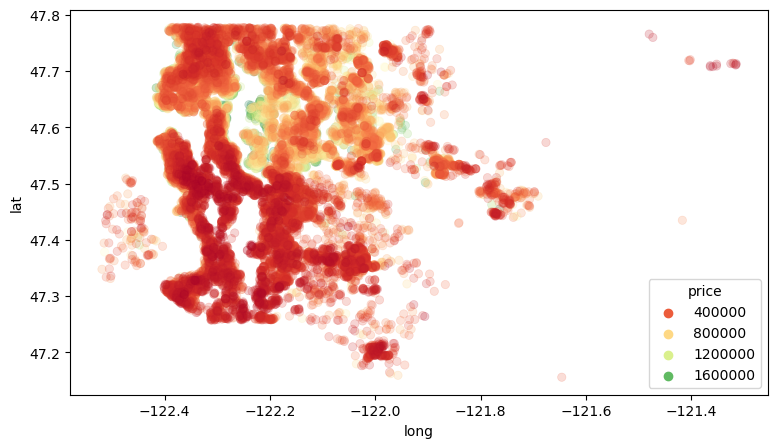

In [19]:
len(data)*(0.01)

non_top_1_perc = data.sort_values('price',ascending=False).iloc[216:]
plt.figure(figsize=(9,5))
sns.scatterplot(x='long',y='lat', data=non_top_1_perc,hue='price', palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features
# Let's have a box plot between waterfront and price. 

# Explain what box plot is doing?

<Axes: xlabel='waterfront', ylabel='price'>

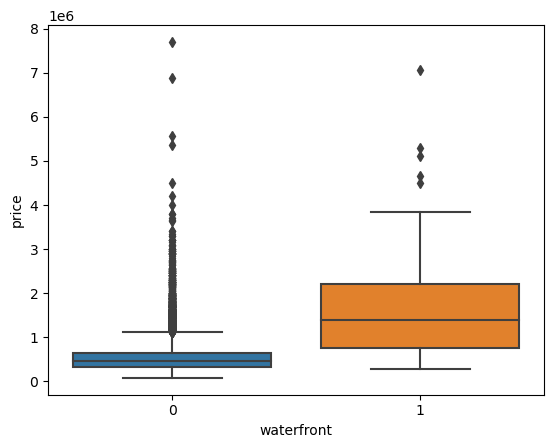

In [376]:
sns.boxplot(x='waterfront',y='price',data=data)

## Working with Feature Data

In [377]:
# Your code to print first few rows of the data.
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [378]:
# Your code to print info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Following code is dropping the column ID. 
Question - why are dropping this column?

In [379]:
len(data)*(0.01)

216.13

In [380]:
non_top_1_perc = data.sort_values('price', ascending=False).iloc[216:]
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,4055701200,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


In [381]:
data = data.drop('id',axis=1)

### Feature Engineering from Date

Transform the features into useful formats to apply appropriate DNN technique!

In [396]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda date:date.month)
data['year'] = data['date'].apply(lambda date:date.year)


# Your code to check what above code is doing. 


<Axes: xlabel='year', ylabel='price'>

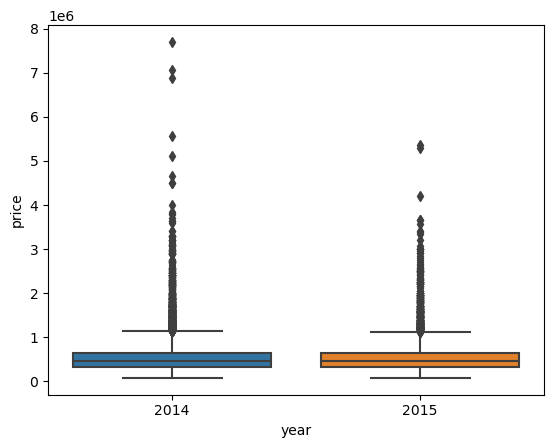

In [383]:
sns.boxplot(x='year',y='price',data=data)

<Axes: xlabel='month', ylabel='price'>

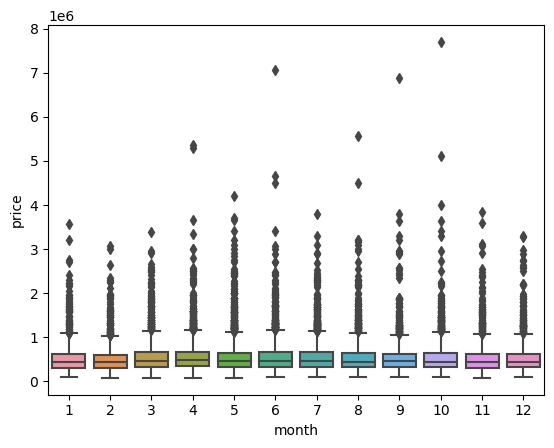

In [384]:
# Your code to visualize boxplot between month and price
sns.boxplot(x='month',y='price',data=data)

In [397]:
# we do not need the 'date' column anymore

data = data.drop('date',axis=1)

In [398]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [386]:
data['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

Should we remove zipcode?  If so, remove it.

In [387]:
# Your code to remove zip code - Hint - Use df.drop

# Your code to remove datetime column.
data = data.drop('zipcode', axis=1)


In [388]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [399]:
# could make sense due to scaling, higher should correlate to more value
data['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [400]:
data['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

#First separate input and output. Input will be stored in the variable X and output in variable y.

In [406]:
# Your code to store all columns except price column in variable X. Hint - Use pd.drop()
X=data.drop('price', axis=1)

# Your code to store output (price column) in variable y
y = data['price']

In [411]:
from sklearn.model_selection import train_test_split 

#Your code to separate X and y into X_train, X_test, y_train, y_test i.e. getting training and testing set for the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [412]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 19) (4323, 19) (17290,) (4323,)


### Scaling

Features are scaled to be in a proper range to be useful for modeling. 
Scaling converts all values between 0-1.

In [416]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [417]:
# Your code to print shapes of X_train, X_test, y_train, y_test and see if shapes are okay.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 19) (4323, 19) (17290,) (4323,)


## Creating a Model

Build a DNN model with appropriate layers using Keras.  

In [424]:
#
# Import Libraries for Neural Network model development.
import tensorflow as tf 
import torch 
from tensorflow import keras
import torch.nn as nn 
import torch.optim as optim
#




Develop your own Neural Network model with suitable number of input, output, and any number of hidden layers. Since we are predicting a value, the number of neurons in outpit layer should be one. 

In [425]:
#
# Your code to build neural network model.
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),

  
    keras.layers.Dense(1)
    ])

#


In [427]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 46337 (181.00 KB)
Trainable params: 46337 (181.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Training the Model

Write the code to train the neural network model. Use the following of your choice:



1.   Optimization method
2.   Batch size
3.   Number of epochs.

Test for various optimizers and check which one performs better in terms of accuracy.

Use following APIs
* https://keras.io/api/optimizers/
* https://keras.io/api/models/model_training_apis/



In [429]:
# ! add your chosen optimiser !

model.compile(optimizer='Adam', loss='mse')

In [430]:
#
# Your code to train the model.
history = model.fit(X_train, y_train, epochs=350, batch_size=32, validation_data=(X_test, y_test))
#

Epoch 1/350

541/541 [==============================] - 2s 2ms/step - loss: 238508867584.0000 - val_loss: 109657546752.0000
Epoch 2/350
541/541 [==============================] - 1s 2ms/step - loss: 87759749120.0000 - val_loss: 94084988928.0000
Epoch 3/350
541/541 [==============================] - 1s 2ms/step - loss: 73468329984.0000 - val_loss: 76784615424.0000
Epoch 4/350
541/541 [==============================] - 1s 2ms/step - loss: 59124854784.0000 - val_loss: 62734860288.0000
Epoch 5/350
541/541 [==============================] - 1s 2ms/step - loss: 50688151552.0000 - val_loss: 56408236032.0000
Epoch 6/350
541/541 [==============================] - 1s 2ms/step - loss: 47275618304.0000 - val_loss: 53769461760.0000
Epoch 7/350
541/541 [==============================] - 1s 2ms/step - loss: 45073661952.0000 - val_loss: 51686699008.0000
Epoch 8/350
541/541 [==============================] - 1s 2ms/step - loss: 43373834240.0000 - val_loss: 50042466304.0000
Epoch 9/350
541/541 [========

# Following code gets the history of losses at every epoch.

<Axes: >

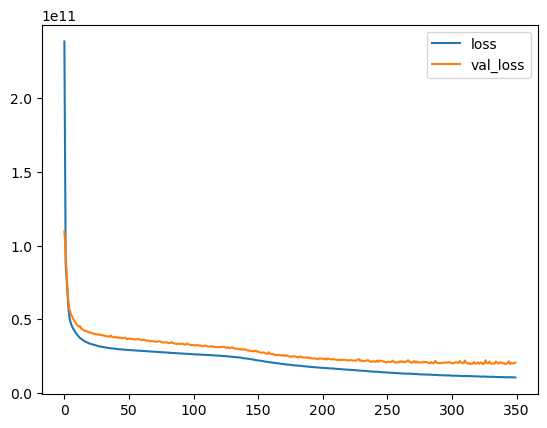

In [432]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Scikit-Learn has metrics to evaluate the performance.

In [433]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

#### Next, we will test the performance of our model by predicting on test dataset X_test.

In [437]:
# Your code to print X_test and see how test data looks like.
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)


136/136 [==============================] - 0s 2ms/step - loss: 20616372224.0000
Test Loss: 20616372224.0


# Following you will predict the output based on the input data X_test.

Lonk to API - https://keras.io/api/models/model_training_apis/#predict-method

In [438]:
# Your code to make a predictions using (model.predict (<input_data>) method ). Store the predictions in the variable predictions
predictions = model.predict(X_test)

136/136 [==============================] - 0s 1ms/step


# Following code will test the error in the predicted values. Error is the difference between the predictions you made and real values (y_test)

In [441]:
print (mean_absolute_error(y_test, predictions ))
print (np.sqrt(mean_squared_error(y_test, predictions))) # There is an error in this line. Fix the error.
print (explained_variance_score(y_test,predictions))

73241.83997838596
143584.02602241418
0.8636821227496032


The following code plots the predicted values in a scatter plot. We have also plotted the perfect predictions.

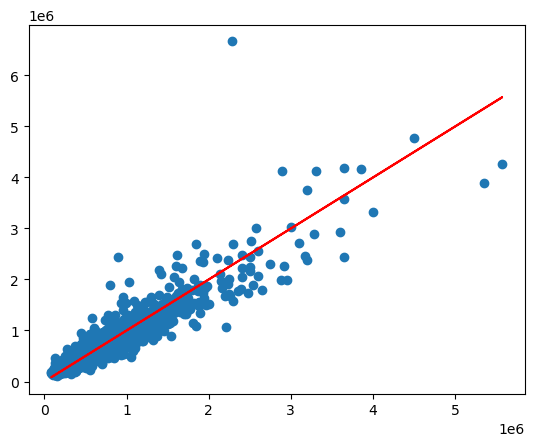

In [442]:
# Our predictions
plt.scatter(y_test, predictions)

# Perfect predictions
plt.plot(y_test, y_test, 'r')

In the following code, we have plotted the error i.e. the difference between the actual and predicted values.

C:\Users\BABATUNDE\AppData\Local\Temp\ipykernel_7436\4034037611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

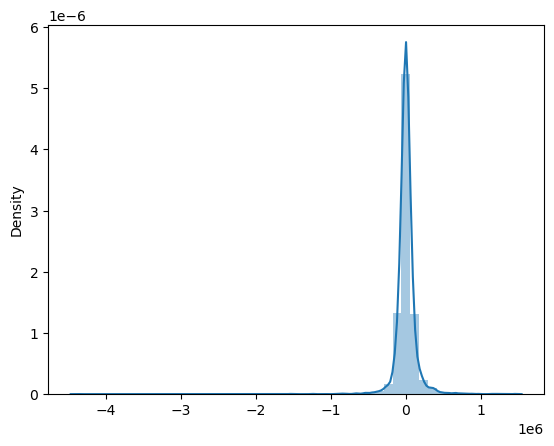

In [444]:
errors = y_test.values.reshape(4323, 1) - predictions
sns.distplot(errors)


### Following code makes prediction on a brand new house. Comment each line of the code.

Try predicting price for a new home.

In [450]:
single_house = data.drop('price',axis=1).iloc[0]

In [451]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [447]:
single_house

date             2014-10-13 00:00:00
bedrooms                           3
bathrooms                        1.0
sqft_living                     1180
sqft_lot                        5650
floors                           1.0
waterfront                         0
view                               0
condition                          3
grade                              7
sqft_above                      1180
sqft_basement                      0
yr_built                        1955
yr_renovated                       0
zipcode                        98178
lat                          47.5112
long                        -122.257
sqft_living15                   1340
sqft_lot15                      5650
month                             10
year                            2014
Name: 0, dtype: object

In [452]:
model.predict(single_house)

1/1 [==============================] - 0s 31ms/step


array([[229861.56]], dtype=float32)

In [449]:
df.iloc[0]

date             2014-10-13 00:00:00
price                       221900.0
bedrooms                           3
bathrooms                        1.0
sqft_living                     1180
sqft_lot                        5650
floors                           1.0
waterfront                         0
view                               0
condition                          3
grade                              7
sqft_above                      1180
sqft_basement                      0
yr_built                        1955
yr_renovated                       0
zipcode                        98178
lat                          47.5112
long                        -122.257
sqft_living15                   1340
sqft_lot15                      5650
month                             10
year                            2014
Name: 0, dtype: object